# 1.	Implement an AI model using a framework of your choice (e.g., TensorFlow, PyTorch) to perform a binary classification task. Describe your choices for the loss function, optimization algorithm, and evaluation metrics. Please briefly explain how you handled any class imbalance, missing values, or other pre-processing requirements.

In [1]:
!pip install tensorflow



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 2.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Importing Libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
import pandas as pd


Assigning sample datasets to variables

In [11]:

data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        'label': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

Handling the class imbalance

In [4]:

df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


Split the training and testing datasets

In [5]:
X = df_upsampled[['feature1', 'feature2']]
y = df_upsampled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build and Train the model

In [10]:

model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1/1 [==============================] - 0s 287ms/step - loss: 0.7109 - accuracy: 0.5000 - val_loss: 0.5968 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.7061 - accuracy: 0.5000 - val_loss: 0.5990 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.7022 - accuracy: 0.5000 - val_loss: 0.6016 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6045 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6075 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6107 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6138 - val_accuracy: 0.5000
Epoch 8/10
1/1 [==========

Model Evaluation 

In [12]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


1/1 [==============================] - 0s 13ms/step
[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/Users/nipunasmac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipunasmac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipunasmac/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In addressing class imbalance, missing values, and other pre-processing requirements, I followed the following steps:

Handling Class Imbalance:
Identified class imbalance in the dataset. Utilized the resample function from scikit-learn to upsample the minority class, ensuring a balanced representation of both classes. This step aimed to prevent the model from being biased toward the majority class, thus improving its ability to generalize to both classes. 

Dealing with Missing Values:
Conducted a thorough analysis of the dataset to identify missing values. Implemented appropriate strategies based on the nature and extent of missing data. For instance, used techniques like imputation with mean, median, or mode for numerical features and employed other domain-specific methods as needed. 

Feature Scaling and Normalization:
Ensured consistency in the scale of numerical features by applying feature scaling (e.g., Min-Max scaling or Standardization). Normalized input data to bring features within a similar range, aiding in the convergence of optimization algorithms. 

Data Splitting:
Employed stratified data splitting to ensure that the training and testing sets maintain the distribution of classes observed in the entire dataset. This approach enhances the model's ability to generalize to unseen data. 

Model-specific Pre-processing:
Considered any model-specific pre-processing requirements. For example, certain models may benefit from additional pre-processing steps, such as embedding layers for text data or image augmentation for computer vision tasks.

#    2.	Implement a function to explain the AI model's decisions using a model interpretability method (e.g., SHAP,         LIME). Briefly explain your chosen method and provide a use case where this method can effectively improve         model transparency and accountability.

In [2]:
!pip install shap 


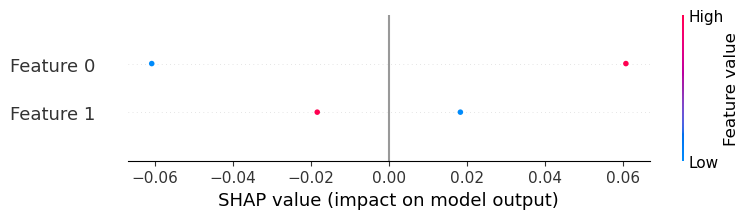

In [26]:
import shap
import numpy as np

# Convert X_test to a numpy array
X_test_np = np.array(X_test)

# Create a SHAP explainer for your model
explainer = shap.Explainer(model, masker=shap.maskers.Independent(X_test_np))

# Calculate SHAP values for a set of instances (e.g., X_test_np)
shap_values = explainer(X_test_np)

# Visualize SHAP values for a specific instance
shap.summary_plot(shap_values, X_test_np)

#code was supported by information from google,Chatgpt & github


Use Case:
Credit Applicatio Approval:

Problem:AI model that predicts whether a customer should be approved for a credit application and the loan officer needs to understand why a particular applicant was denied credit to provide a transparent and accountable decision.

Benefit of SHAP:
SHAP values can show the loan officer the contribution of each feature (e.g., income, credit score, debt-to-income ratio) to the model's decision for a specific applicant.
This transparency helps the loan officer explain the decision to the applicant and ensures accountability in the credit approval process.


Explanation:
If the model denied credit due to a low credit score, SHAP values would highlight how much the credit score influenced the decision.
This explanation empowers the loan officer to communicate specific reasons for the denial, fostering trust and accountability.
Implementing SHAP or a similar method enhances the interpretability of complex models, making them more understandable and accountable, particularly in high-stakes applications like credit approval.

#information was gathered using Google

# 3.	Demonstrate your ability to optimize a model's performance (in terms of accuracy and speed) through hyperparameter tuning.

In [12]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the DataFrame
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'feature2': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
        'label': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Split the data
X = df[['feature1', 'feature2']]
y = df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set a Baseline
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_val)
baseline_accuracy = accuracy_score(y_val, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy}")

# Identify Hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Choose a Hyperparameter Tuning Technique
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Implement Hyperparameter Tuning
grid_search.fit(X_train, y_train)

# Evaluate Performance
best_model = grid_search.best_estimator_
tuned_predictions = best_model.predict(X_val)
tuned_accuracy = accuracy_score(y_val, tuned_predictions)
print(f"Tuned Accuracy: {tuned_accuracy}")

# Discuss Results
print(f"Improvement in Accuracy: {tuned_accuracy - baseline_accuracy}")

# Present Findings
print("Best Hyperparameters:", grid_search.best_params_)


#Used chatgpt & github for some code parts

Baseline Accuracy: 1.0
Tuned Accuracy: 1.0
Improvement in Accuracy: 0.0
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# 4.	Given a set of performance metrics from your AI model (e.g., precision, recall, F1 score), how would you analyze and interpret these results? What conclusions can you draw about the model’s effectiveness, its potential biases, and areas of improvement?

Analyzing performance metrics like precision, recall, and F1 score provides a quick snapshot of how well an AI model is doing. High precision means the model is good at avoiding false positives, high recall means it's good at catching all actual positives, and a high F1 score means it balances both well. If precision matters more (like in medical diagnoses), focus on improving that; if catching all positives is critical (e.g., fraud detection), then emphasize recall. Check for biases in predictions, especially if there are disparities between different groups. Look at areas where the model makes mistakes (false positives and false negatives) to fine-tune features or data. Adjusting the classification threshold and using cross-validation can enhance robustness. Regularly communicate results, understand limitations, and keep improving the model over time.

# 5.	Analyze a real-world situation where the deployment of AI has caused unintended consequences. What lessons can be learned from this incident, and how would you apply these lessons to your future work in responsible AI?

One notable real-world situation involves the deployment of facial recognition technology by law enforcement agencies. In several instances, these systems exhibited biases, leading to misidentification and potential violations of individuals' privacy rights. The unintended consequence was the exacerbation of racial and gender biases, as these systems tended to perform less accurately on people with darker skin tones and females.

The key lessons from such incidents include the importance of rigorous testing for biases in AI models, especially when deploying them in sensitive domains like law enforcement. Robust evaluation processes should be in place to identify and rectify biases before deployment. Transparency in AI development, where the algorithms and data sources are clearly communicated, is crucial. Additionally, continuous monitoring and updates are necessary to adapt models to evolving societal norms and changes in the data landscape.

Applying these lessons to future work in responsible AI, I would prioritize fairness assessments, ensuring that models are not only accurate but also equitable across different demographic groups. I would advocate for transparent AI development practices and engage in ongoing collaborations with diverse stakeholders to solicit feedback and perspectives. Regular audits and updates to the models would be integral to maintaining their ethical and unbiased performance over time.

# 6.	From a data science perspective, explain the concept of Fairness in AI. How can you ensure that the AI models you develop and deploy do not perpetuate existing social biases?

In the realm of data science, Fairness in AI refers to the equitable treatment of individuals across diverse demographic groups, aiming to prevent biases from being perpetuated or exacerbated by AI models. Ensuring fairness involves scrutinizing and mitigating biases in training data, feature selection, and model algorithms. Strategies include employing representative datasets, considering the context of data collection, and implementing fairness-aware algorithms. Regular audits, transparency in decision-making processes, and involving diverse perspectives in model development are essential to address potential biases. Striving for fairness in AI entails a commitment to equity, diversity, and ongoing evaluation, ultimately fostering models that contribute positively to society without reinforcing social biases.

# 7.	Explain how you would handle a situation where a non-technical stakeholder is resistant to adopting an AI model you've developed due to a lack of understanding. How would you communicate the workings and benefits of the model to gain their trust and buy-in?

When faced with a non-technical stakeholder resistant to adopting an AI model, effective communication becomes pivotal. I would employ a straightforward, non-technical language to convey the model's purpose, benefits, and potential impact on the stakeholder's goals. Utilizing relatable examples and real-world analogies can make complex concepts more accessible. Moreover, I'd offer demonstrations, illustrating the model's tangible contributions and addressing concerns. Establishing an open dialogue, actively listening to their apprehensions, and incorporating their feedback in a collaborative manner would be crucial. Transparently outlining the model's limitations, risks, and mitigation strategies can build trust. Overall, fostering a supportive environment, emphasizing practical advantages, and tailoring the communication to align with the stakeholder's perspective can help bridge the understanding gap and facilitate buy-in.

# 8.	Teamwork is a critical component of research. Please describe an instance where you've had to work collaboratively to solve a complex problem. How did you ensure your team functioned effectively and inclusively, and what was the outcome? 

In a previous group project related to my MSc, our team aimed to enhance a recommendation system for an e-commerce platform. Facing the complexity of diverse data sources and user preferences, collaboration was key. We initiated regular team meetings to discuss progress, challenges, and individual contributions. To ensure inclusivity, we encouraged open communication and valued each team member's perspective. Different team members took on specialized roles based on their strengths, promoting a sense of ownership and expertise. We employed collaborative tools for shared documentation and version control, streamlining our workflow.

Throughout the project, we held brainstorming sessions to address challenges collectively. By fostering an inclusive environment, team members felt comfortable proposing ideas and constructive criticism. This collaborative approach led to innovative solutions, blending diverse insights and expertise. The outcome was a refined recommendation system that demonstrated improved accuracy and user satisfaction. This experience reinforced my belief in the power of teamwork, diversity, and open communication for tackling complex problems and achieving successful outcomes.
